In [ ]:
from numpy import array
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
df_reviews = pd.read_json('/drive/MyDrive/Colab Notebooks/CS3244 Machine Learning/CS3244 Group Project/Data/IMDB_reviews.json', lines= True)
df_details = pd.read_json('/drive/MyDrive/Colab Notebooks/CS3244 Machine Learning/CS3244 Group Project/Data/IMDB_movie_details.json', lines= True)
clean_test = pd.read_json('/drive/MyDrive/Colab Notebooks/CS3244 Machine Learning/CS3244 Group Project/clean_dataset.json')

In [ ]:
print('User reviews shape: ', df_reviews.shape)
print('Movie details shape: ', df_details.shape)
print('Unique films in reviews dataset:', df_reviews['movie_id'].nunique())
print('Reviews:\n', df_reviews.nunique())

In [ ]:
df_reviews.head()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"


In [ ]:
df_details.head()

,movie_id,plot_summary,duration,genre,rating,release_date,plot_synopsis
0,tt0105112,"Former CIA analyst, Jack Ryan is in England wi...",1h 57min,"[Action, Thriller]",6.9,1992-06-05,"Jack Ryan (Ford) is on a ""working vacation"" in..."
1,tt1204975,"Billy (Michael Douglas), Paddy (Robert De Niro...",1h 45min,[Comedy],6.6,2013-11-01,Four boys around the age of 10 are friends in ...
2,tt0243655,"The setting is Camp Firewood, the year 1981. I...",1h 37min,"[Comedy, Romance]",6.7,2002-04-11,
3,tt0040897,"Fred C. Dobbs and Bob Curtin, both down on the...",2h 6min,"[Adventure, Drama, Western]",8.3,1948-01-24,Fred Dobbs (Humphrey Bogart) and Bob Curtin (T...
4,tt0126886,Tracy Flick is running unopposed for this year...,1h 43min,"[Comedy, Drama, Romance]",7.3,1999-05-07,Jim McAllister (Matthew Broderick) is a much-a...


In [ ]:
df_reviews.dropna()

,review_date,movie_id,user_id,is_spoiler,review_text,rating,review_summary
0,10 February 2006,tt0111161,ur1898687,True,"In its Oscar year, Shawshank Redemption (writt...",10,A classic piece of unforgettable film-making.
1,6 September 2000,tt0111161,ur0842118,True,The Shawshank Redemption is without a doubt on...,10,Simply amazing. The best film of the 90's.
2,3 August 2001,tt0111161,ur1285640,True,I believe that this film is the best story eve...,8,The best story ever told on film
3,1 September 2002,tt0111161,ur1003471,True,"**Yes, there are SPOILERS here**This film has ...",10,Busy dying or busy living?
4,20 May 2004,tt0111161,ur0226855,True,At the heart of this extraordinary movie is a ...,8,"Great story, wondrously told and acted"
...,...,...,...,...,...,...,...
573908,8 August 1999,tt0139239,ur0100166,False,"Go is wise, fast and pure entertainment. Assem...",10,The best teen movie of the nineties
573909,31 July 1999,tt0139239,ur0021767,False,"Well, what shall I say. this one´s fun at any ...",9,Go - see the movie
573910,20 July 1999,tt0139239,ur0392750,False,"Go is the best movie I have ever seen, and I'v...",10,It's the best movie I've ever seen
573911,11 June 1999,tt0139239,ur0349105,False,Call this 1999 teenage version of Pulp Fiction...,3,Haven't we seen this before?


0.7370263437141169

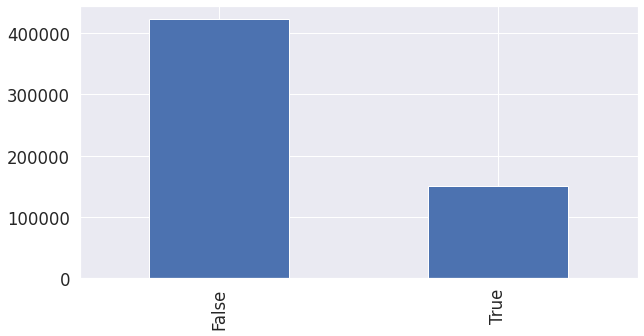

In [ ]:
# Check for imbalanced data 
plt.grid()
df_reviews['is_spoiler'].value_counts()
df_reviews['is_spoiler'].value_counts().plot.bar(figsize = (10,5))
# Get spoiler ratios
len(df_reviews.loc[df_reviews['is_spoiler'] == True]) / len(df_reviews) # 26%
len(df_reviews.loc[df_reviews['is_spoiler'] == False])/ len(df_reviews) # 73%

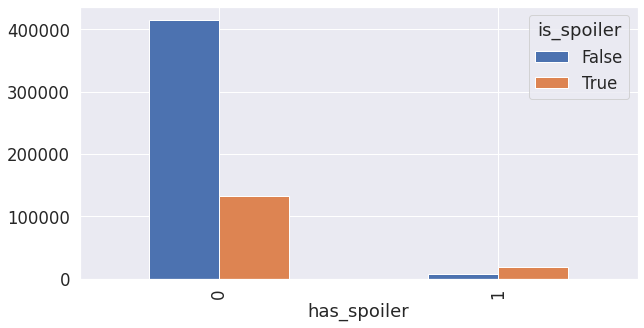

In [ ]:
# What type of phrase contributes to a spoiler classification?
# Does the word spoiler appear a lot in reviews with spoilers?
df_phrase = pd.DataFrame()
df_phrase['is_spoiler'] = df_reviews['is_spoiler']
df_phrase['has_spoiler'] = df_reviews['review_text'].apply(lambda text: 1 if 'SPOILER' in text.upper() else 0)
#df_phrase.groupby('is_spoiler')['has_spoiler'].value_counts() 
#df_phrase.groupby('is_spoiler')['has_spoiler'].value_counts().unstack().plot.bar(figsize = (10,5))
df_phrase.groupby('has_spoiler')['is_spoiler'].value_counts().unstack().plot.bar(figsize = (10,5))

In [ ]:
# make pie charts to focus on spoilers only
#df_phrase[df_phrase['is_spoiler'] == True].value_counts().plot.pie(figsize=(6, 6)) #(True,1) indicates that spoiler had the word 'spoiler'

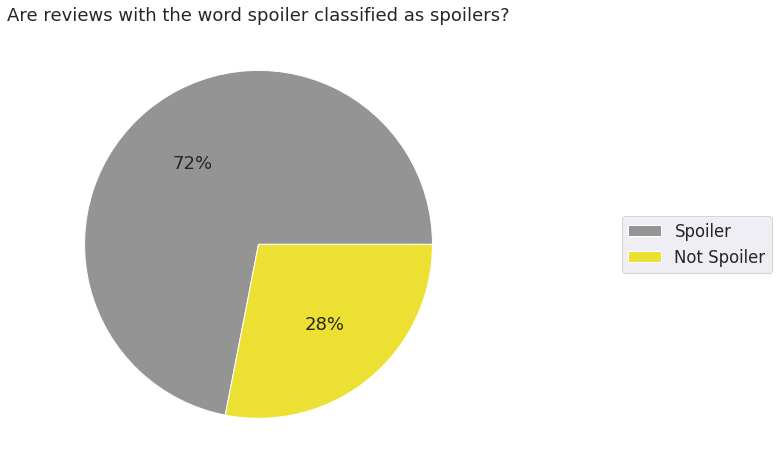

In [ ]:
fig, ax = plt.subplots()
sns.set(rc = {'figure.figsize':(10,8)})
sns.set(font_scale = 1.5)
colors = sns.color_palette('colorblind')[7:9]
labels = ["Spoiler", "Not Spoiler"]
data = list(df_phrase[df_phrase['has_spoiler'] == 1].is_spoiler.value_counts())
plt.pie(data, colors = colors, autopct='%.0f%%')
plt.legend(labels, loc = "center right", bbox_to_anchor=(1, 0, 0.7, 1))
ax.set_title('Are reviews with the word spoiler classified as spoilers?')
plt.show()
#fig.savefig('Word-Spoiler.png', bbox_inches='tight')

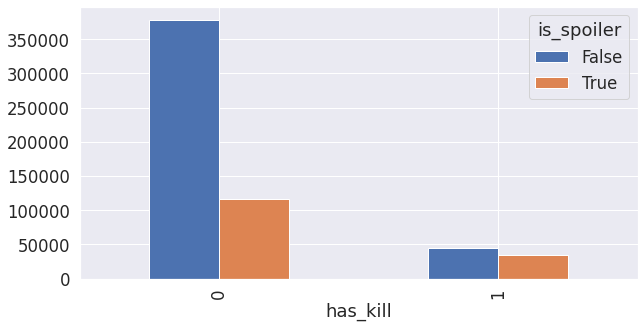

In [ ]:
# Does the word 'kill' appear a lot in reviews with spoilers?
df_phrase['has_kill'] = df_reviews['review_text'].apply(lambda text: 1 if 'KILL' in text.upper() else 0)
df_phrase.groupby('is_spoiler')['has_kill'].value_counts() 
df_phrase.groupby('has_kill')['is_spoiler'].value_counts().unstack().plot.bar(figsize = (10,5))

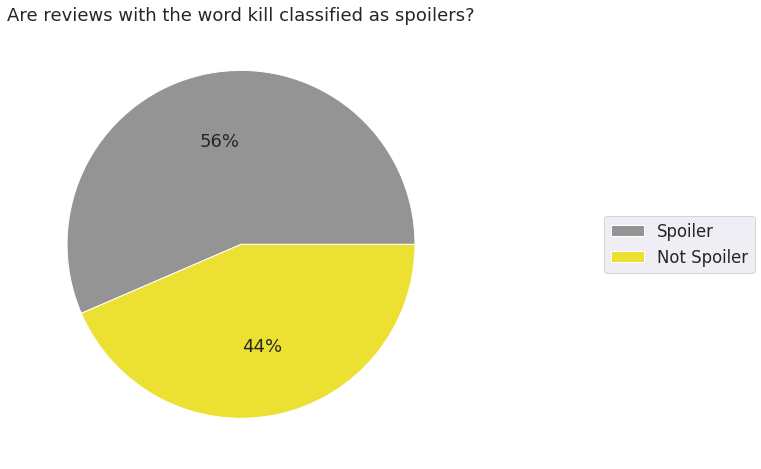

In [ ]:
fig2, ax2 = plt.subplots()
sns.set(rc = {'figure.figsize':(10,8)})
sns.set(font_scale = 1.5)
colors = sns.color_palette('colorblind')[7:9]
labels2 = ["Spoiler", "Not Spoiler"]
data2 = list(df_phrase[df_phrase['has_kill'] == 1].is_spoiler.value_counts())
plt.pie(data2, colors = colors, autopct='%.0f%%')
plt.legend(labels2, loc = "center right", bbox_to_anchor=(1, 0, 0.7, 1))
ax2.set_title('Are reviews with the word kill classified as spoilers?')
plt.show()
#fig.savefig('Word-Spoiler.png', bbox_inches='tight')

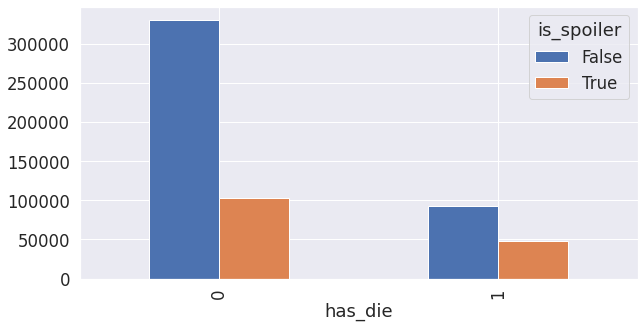

In [ ]:
# Does the word 'die' appear a lot in reviews with spoilers?
df_phrase['has_die'] = df_reviews['review_text'].apply(lambda text: 1 if 'DIE' in text.upper() else 0)
df_phrase.groupby('is_spoiler')['has_die'].value_counts() 
df_phrase.groupby('has_die')['is_spoiler'].value_counts().unstack().plot.bar(figsize = (10,5))

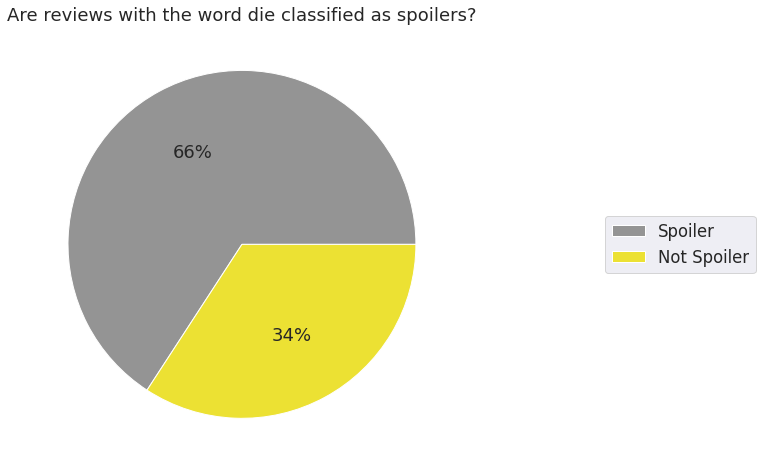

In [ ]:
fig3, ax3 = plt.subplots()
sns.set(rc = {'figure.figsize':(10,8)})
sns.set(font_scale = 1.5)
colors = sns.color_palette('colorblind')[7:9]
labels3 = ["Spoiler", "Not Spoiler"]
data3 = list(df_phrase[df_phrase['has_die'] == 1].is_spoiler.value_counts())
plt.pie(data3, colors = colors, autopct='%.0f%%')
plt.legend(labels3, loc = "center right", bbox_to_anchor=(1, 0, 0.7, 1))
ax3.set_title('Are reviews with the word die classified as spoilers?')
plt.show()
#fig.savefig('Word-Spoiler.png', bbox_inches='tight')

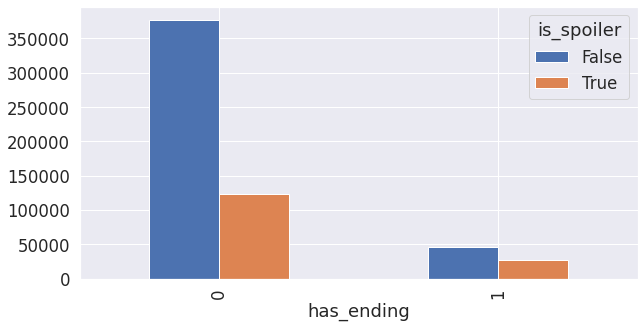

In [ ]:
# Does the word 'ending' appear a lot in reviews with spoilers?
df_phrase['has_ending'] = df_reviews['review_text'].apply(lambda text: 1 if 'ENDING' in text.upper() else 0)
df_phrase.groupby('is_spoiler')['has_ending'].value_counts() 
df_phrase.groupby('has_ending')['is_spoiler'].value_counts().unstack().plot.bar(figsize = (10,5))

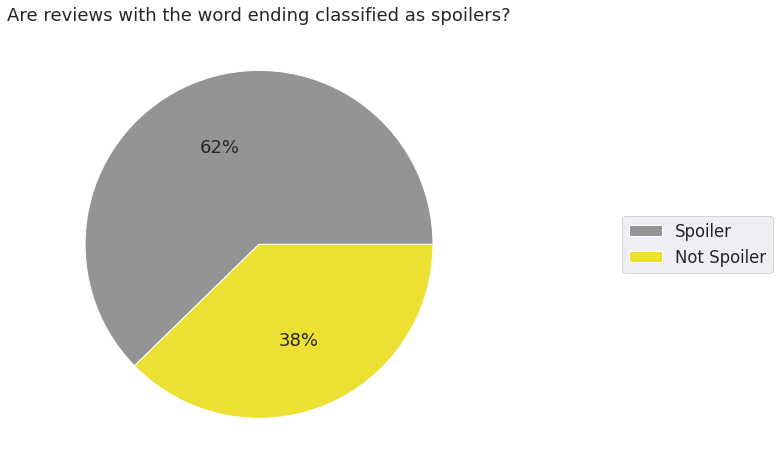

In [ ]:
fig4, ax4 = plt.subplots()
sns.set(rc = {'figure.figsize':(10,8)})
sns.set(font_scale = 1.5)
colors = sns.color_palette('colorblind')[7:9]
labels4 = ["Spoiler", "Not Spoiler"]
data4 = list(df_phrase[df_phrase['has_ending'] == 1].is_spoiler.value_counts())
plt.pie(data4, colors = colors, autopct='%.0f%%')
plt.legend(labels4, loc = "center right", bbox_to_anchor=(1, 0, 0.7, 1))
ax4.set_title('Are reviews with the word ending classified as spoilers?')
plt.show()
#fig.savefig('Word-Spoiler.png', bbox_inches='tight')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150924 entries, 0 to 573644
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   review_date     150924 non-null  object
 1   movie_id        150924 non-null  object
 2   user_id         150924 non-null  object
 3   is_spoiler      150924 non-null  bool  
 4   review_text     150924 non-null  object
 5   rating          150924 non-null  int64 
 6   review_summary  150924 non-null  object
 7   review_length   150924 non-null  int64 
dtypes: bool(1), int64(2), object(5)
memory usage: 9.4+ MB


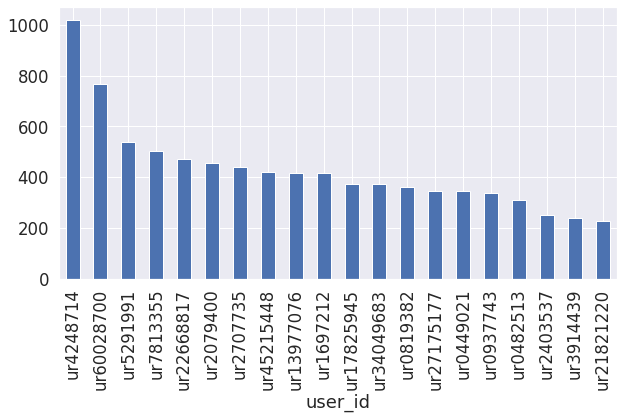

In [ ]:
#Does a certain user repeatedly post reviews with spoilers? 
df_reviews_with_spoilers = df_reviews.loc[df_reviews["is_spoiler"] == True]
df_reviews_with_spoilers.info()
df_reviews_with_spoilers.groupby('user_id')['is_spoiler'].size().sort_values(ascending = False).head(20) # Number of unique user ids
df_reviews_with_spoilers.groupby('user_id')['is_spoiler'].size().sort_values(ascending = False).head(20).plot.bar(figsize = (10,5))
#user_id = ur4248714 has posted the most spoilers
#proportion of spoilers by ur4248714 = 1019/len(df_reviews_with_spoilers)

In [ ]:
'''
#Does the length of the review correlate to the possibility of spoilers?
df_reviews['review_length'] = df_reviews['review_text'].apply(len)
df_reviews['review_length'] = df_reviews['review_length'] / 1000 # create column with review length 
#fig, ax = plt.subplots()
sns.histplot(df_reviews[df_reviews["is_spoiler"] == True]['review_length'], bins = 20, kde = True)
# change colours and plot types
'''

In [ ]:
#Does the length of the review correlate to the possibility of spoilers?
def length(x):
  return(len(x.split()))
df_reviews['review_length'] = df_reviews['review_text'].apply(length)
spoiler_lengths = df_reviews[df_reviews['is_spoiler']==1]['review_length']
non_spoiler_lengths = df_reviews[df_reviews['is_spoiler']==0]['review_length']

In [ ]:
len(df_reviews[df_reviews['review_length'] > 1000])  #negligible amount -- should we remove from our dataset?

510

<p>Use the plot below to assign bins to divide data by.</p>
<p>Example: </p>
<p>Short: <=200</p>
<p> Medium : 200 < x <= 400 </p>
<p>Long: > 400 </p>
<p>Divide based on proportion of data too.</p>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


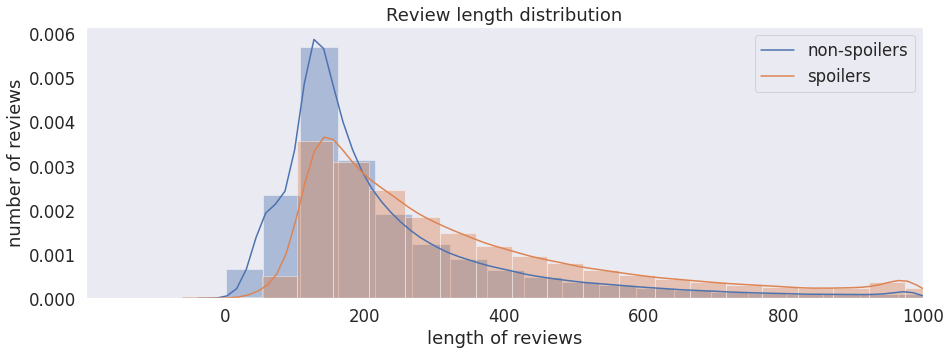

In [ ]:
plt.figure(figsize=(15,5))
plt.title('Review length distribution')
sns.distplot(non_spoiler_lengths, kde = True)
sns.distplot(spoiler_lengths, kde = True)
plt.legend(['non-spoilers', 'spoilers'])
plt.xlabel('length of reviews') # length is word count
plt.ylabel('number of reviews')
plt.xlim(xmax = 1000)  #comment out this if needed
plt.grid()
plt.show()

-0.09341061674937491

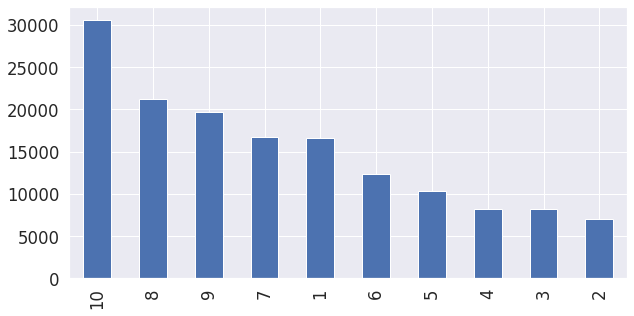

In [ ]:
#Do users post spoilers more when they like / do not like the film (based on their rating)? 
# Group data based on user ratings and filter out spoilers and chart out value counts
# Group data based on movie ratings and filter out spoilers and chart out value counts 
# sns.scatterplot(data = df_reviews, x = "rating", y = "is_spoiler")
'''
fig5, ax5 = plt.subplots(figsize=(13, 7))
sns.lineplot(data = merge_df[merge_df["is_spoiler"]], x= ’user_rating’, y= ) #only take spoiler and count them for each rating
ax.set_xticks()
plt.title("")
plt.legend()
plt.ylabel("")
plt.xlabel("")
plt.show()
'''
spoilers = df_reviews[df_reviews["is_spoiler"] == True]
spoilers.rating.value_counts().plot.bar(figsize = (10,5))
#rates = spoilers.set_index().rating.stack().reset_index(level=1, drop=True);
#sns.countplot(y = spoilers.rating, order = spoilers.rating.value_counts())#.index[:20])
# Does genre have a correlation with spoilers
df_reviews["rating"].corr(df_reviews["is_spoiler"], method = "spearman")

In [ ]:
# merge data based on id
# scatter plot of user ratings vs movie ratings, distinguish by spoiler 
df_merge = pd.merge(df_reviews, df_details, on = 'movie_id')

In [ ]:
df_merge.head()

In [ ]:
sns.scatterplot(data = df_merge[df_merge['is_spoiler'] == True], x = "rating_x", y = "rating_y") #hue = "is_spoiler")
#sns.scatterplot(data = df_merge, x = "user_rating", y = "movie_rating", hue = "is_spoiler")
# change rating labels before plotting